Assignment contributors:<br/>
JAISE K JOSEPH - 2018ab04633<br/>
VORUGANTI ACHYUTH REDDY - 2018ab04637<br/>
K KIRAN KUMAR - 2018ab04684


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize, sent_tokenize 
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')
# from google.colab import drive

[nltk_data] Downloading package stopwords to /home/kiran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/kiran/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/kiran/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


<h4>Import data from CSV</h4>

In [2]:
TweetData = pd.read_csv('Tweets.csv')

In [3]:
TweetData.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-4-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


<h4>Get specific columns from the Tweets data</h4>

In [5]:
data = TweetData[['airline_sentiment','text','negativereason','airline_sentiment_confidence']]

In [6]:
TweetData.shape

(14640, 15)

In [7]:
TweetData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

<h4>Airline sentiments categories and count</h4>

In [8]:
TweetData['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

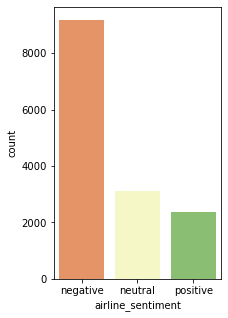

In [9]:
plt.figure(figsize=(3,5))
sns.countplot(TweetData['airline_sentiment'], order =TweetData.airline_sentiment.value_counts().index,palette= 'RdYlGn')
plt.show()

<h4>Airlines Tweets distribution</h4>

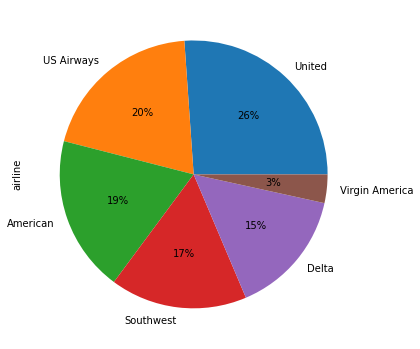

In [10]:
plt.figure(figsize=(6,8))
TweetData.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

<h4>Distribution of sentiments based on the airline</h4>

<Figure size 432x576 with 0 Axes>

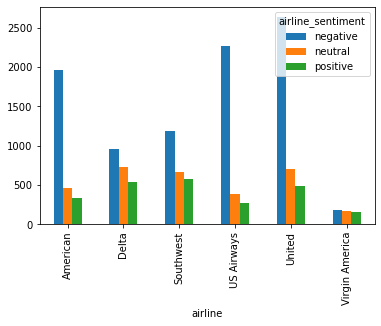

In [11]:
plt.figure(figsize=(6,8))
airline_sentiment = TweetData.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

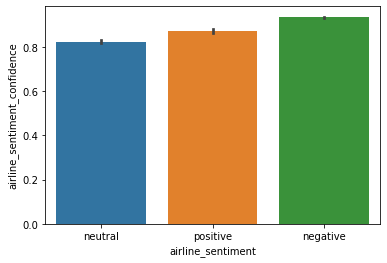

In [12]:
sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=TweetData)

In [13]:
air_sentiment_Percentage =(pd.crosstab(TweetData.airline, TweetData.airline_sentiment)).apply(lambda a: a / a.sum() * 100, axis=1)
air_sentiment_Percentage

airline_sentiment,negative,neutral,positive
airline,,,
American,71.040232,16.781443,12.178325
Delta,42.979298,32.538254,24.482448
Southwest,49.008264,27.438017,23.553719
US Airways,77.686234,13.079300,9.234466
United,68.890633,18.236525,12.872841
Virgin America,35.912698,33.928571,30.158730


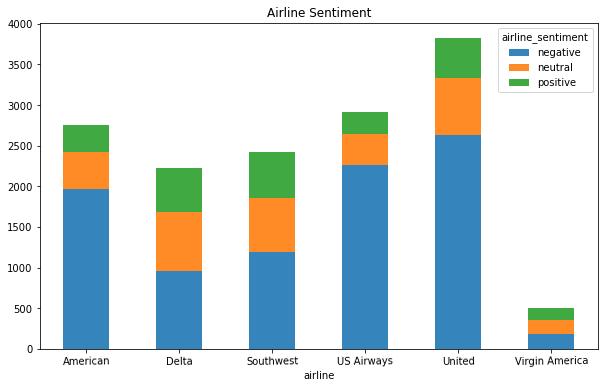

In [14]:
pd.crosstab(index = TweetData["airline"],columns = TweetData["airline_sentiment"]).plot(kind='bar',
                figsize=(10, 6),alpha=0.9,rot=.8,stacked=True,title="Airline Sentiment")


In [15]:
#counting the total number of negative reasons
TweetData.negativereason.value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight               847 
Lost Luggage                   724 
Bad Flight                     580 
Flight Booking Problems        529 
Flight Attendant Complaints    481 
longlines                      178 
Damaged Luggage                74  
Name: negativereason, dtype: int64

Text(0, 0.5, 'No. of Tweets')

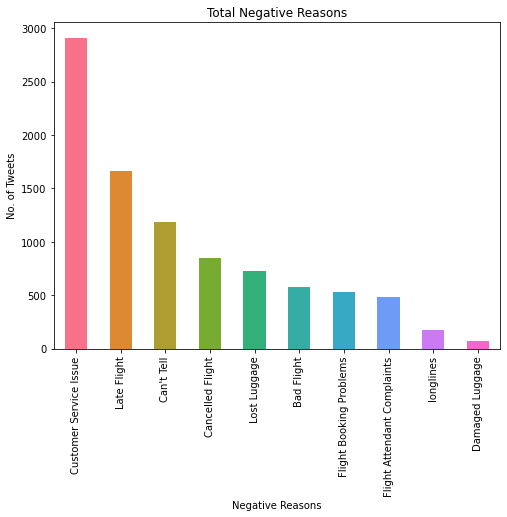

In [16]:
#Plotting all the negative reasons 
color=sns.color_palette("husl", 10)
pd.Series(TweetData["negativereason"]).value_counts().plot(kind = "bar",
                        color=color,figsize=(8,6),title = "Total Negative Reasons")
plt.xlabel('Negative Reasons', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

In [17]:
TweetData = TweetData.reindex(np.random.permutation(TweetData.index))
TweetData = TweetData[['text', 'airline_sentiment']]

In [18]:
TweetData.head()

,text,airline_sentiment
40,"@VirginAmerica View of downtown Los Angeles, the Hollywood Sign, and beyond that rain in the mountains! http://t.co/Dw5nf0ibtr",positive
11729,@USAirways holding 30+ min and listening to your shitty ads on repeat for your credit make me hate your airline even more. @delta is better,negative
2858,@united UA1023 sitting on Tarmac at ORD when there are visibly gates open. Reassign our gate.,negative
5868,@SouthwestAir Oops...no functioning bathrooms on a fairly full flight? Hope everyone on 702 from New York can hold it. Me included.,negative
9988,"@USAirways has failed me all day long, should I blame it on @AmericanAir ?",negative


In [19]:
stop_words = list(stopwords.words('english'))

In [20]:
def apply_preprocessing(sentence):
    sentence = sentence.lower()
    sentence = ''.join([c for c in sentence if c not in string.punctuation])
    text_tokens = word_tokenize(sentence)
    sentence_without_sw = ' '.join([word for word in text_tokens if not word in stopwords.words()])
    return sentence_without_sw


In [21]:
TweetData['text'] = TweetData['text'].apply(apply_preprocessing)

In [22]:
TweetData.head()

,text,airline_sentiment
40,virginamerica view downtown angeles hollywood sign beyond rain mountains httptcodw5nf0ibtr,positive
11729,usairways holding 30 listening shitty ads repeat credit make hate airline even delta better,negative
2858,united ua1023 sitting tarmac ord visibly gates open reassign gate,negative
5868,southwestair oopsno functioning bathrooms fairly full flight hope everyone 702 new york hold included,negative
9988,usairways failed day long blame americanair,negative


In [23]:
XTrain, XTest, YTrain, YTest = train_test_split(TweetData['text'], TweetData['airline_sentiment'], test_size=0.3, random_state=11)

In [24]:
XTrain.describe()
XTrain

5354     southwestair dm sent thank                                                                         
1179     united looks like today 6th consecutive delayed flight youdo win prize southwest air dont fly sba 😭
8556     jetblue wish ground operation expedient twitter response team delay got extended                   
14159    americanair made flight still update emails landed info ever sent second flight losing             
11672    usairways 3 hours hold oh wait less 5 minutes useless csr talked put back hold last 30 minutes     
                                                      ...                                                   
9927     usairways weve learned never fly youve lost 16 customers group hundreds company                    
9533     usairways understand attempting change information identical tells call                            
4769     southwestair rt kkwhb paid early bird boarding got b46 said lady well system dead didnt understand 
5771     southwesta

In [25]:
XTest.describe()

count     4392        
unique    4344        
top       united thank
freq      7           
Name: text, dtype: object

<h4>create the count vectorized for the tweets text</h4>

In [26]:
vectorizer = CountVectorizer(min_df=.001, max_df=.8, stop_words='english')

Xtrain_dt = vectorizer.fit_transform(XTrain)
Xtest_dt = vectorizer.transform(XTest)
#XTrainVect = vect.fit_transform(XTrain)
#XTestVect = vect.fit_transform(XTest)

In [27]:
Xtrain_dt.shape


(10248, 1154)

In [28]:
Xtest_dt.shape

(4392, 1154)

In [29]:
print(Xtrain_dt.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [30]:
LabelEncode = LabelEncoder()
YTrainLabelEncode = LabelEncode.fit_transform(YTrain)
YTestLabelEncode = LabelEncode.transform(YTest)

In [31]:
YTrainLabelEncode

array([2, 0, 0, ..., 0, 0, 1])

In [32]:
YTestLabelEncode

array([0, 0, 0, ..., 2, 2, 1])

# Multi Nominal Naive Bays classifier

In [33]:
mnb_classifier = MultinomialNB()


In [34]:
mnb_classifier.fit(Xtrain_dt, YTrainLabelEncode)

MultinomialNB()

In [35]:
mnb_prediction = mnb_classifier.predict(Xtest_dt)

In [36]:
mnb_prediction

array([0, 2, 0, ..., 2, 2, 0])

In [37]:
accuracy_score(YTestLabelEncode, mnb_prediction)

0.7534153005464481

# Display the POS tagging on the first 4 rows of ‘text’ 

In [38]:
PosData = TweetData['text'][:4]
PosData.reset_index(drop=True, inplace=True)

In [39]:
PosData

0    virginamerica view downtown angeles hollywood sign beyond rain mountains httptcodw5nf0ibtr           
1    usairways holding 30 listening shitty ads repeat credit make hate airline even delta better          
2    united ua1023 sitting tarmac ord visibly gates open reassign gate                                    
3    southwestair oopsno functioning bathrooms fairly full flight hope everyone 702 new york hold included
Name: text, dtype: object

In [40]:
stop_words = set(stopwords.words('english')) 
for i in PosData:
  tokenized = sent_tokenize(i) 
  for i in tokenized: 
      
    # Word tokenizers is used to find the words  
    # and punctuation in a string 
    wordsList = nltk.word_tokenize(i) 
  
    # removing stop words from wordList 
    wordsList = [w for w in wordsList if not w in stop_words]  
  
    #  Using a Tagger. Which is part-of-speech  
    # tagger or POS-tagger.  
    tagged = nltk.pos_tag(wordsList) 
  
    print(tagged) 

[('virginamerica', 'NN'), ('view', 'NN'), ('downtown', 'NN'), ('angeles', 'NNS'), ('hollywood', 'VBD'), ('sign', 'JJ'), ('beyond', 'IN'), ('rain', 'NN'), ('mountains', 'NNS'), ('httptcodw5nf0ibtr', 'VBP')]
[('usairways', 'NNS'), ('holding', 'VBG'), ('30', 'CD'), ('listening', 'VBG'), ('shitty', 'JJ'), ('ads', 'NNS'), ('repeat', 'VBP'), ('credit', 'NN'), ('make', 'VBP'), ('hate', 'JJ'), ('airline', 'NN'), ('even', 'RB'), ('delta', 'VBZ'), ('better', 'RBR')]
[('united', 'JJ'), ('ua1023', 'JJ'), ('sitting', 'VBG'), ('tarmac', 'NN'), ('ord', 'NN'), ('visibly', 'RB'), ('gates', 'VBZ'), ('open', 'JJ'), ('reassign', 'NN'), ('gate', 'NN')]
[('southwestair', 'NN'), ('oopsno', 'MD'), ('functioning', 'VBG'), ('bathrooms', 'NNS'), ('fairly', 'RB'), ('full', 'JJ'), ('flight', 'NN'), ('hope', 'VBP'), ('everyone', 'NN'), ('702', 'CD'), ('new', 'JJ'), ('york', 'NN'), ('hold', 'NN'), ('included', 'VBD')]


# Build and display a dependency parser tree for the sentence:

In [41]:
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')
about_interest_text = ("Ned's eldest son, Robb, gathered an army and rose up in rebellion against the Lannisters, trying to win the independence of his kingdom.")
about_interest_doc = nlp(about_interest_text)
displacy.render(about_interest_doc, style='dep', jupyter=True)